In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [63]:
omim_df = read.csv('omim_enrichment//mono_poly_dz_df_filt.csv',stringsAsFactor=F)
dim(omim_df)
omim_df = omim_df%>%
    mutate(pval_adj = p.adjust(hypergeom_pval,'fdr'))%>%
    filter( pval_adj<0.10)%>%
    mutate(neglogpval = pmin(5,-log10(pval_adj)))
colnames(omim_df)
dim(omim_df)

[1] 133  13

[1] "X"              "mono_dz"        "poly_dz"        "mono_geneset"  
 [5] "poly_geneset"   "len_mono"       "len_poly"       "polydz"        
 [9] "len_overlap"    "hypergeom_pval" "pval_adj"       "poly_dz_abbr"  
[13] "overlap"        "neglogpval"

[1] 40 14

In [64]:
length(unique(omim_df$mono_dz))

[1] 35

In [65]:
omim_df%>%group_by(poly_dz_abbr)%>%tally()

poly_dz_abbr,n
<chr>,<int>
,2
ADHD,3
BPD,9
GAD,3
MDD,11
OCD,4
SCZ,8


In [66]:
omim_df%>%select(-poly_geneset)

X,mono_dz,poly_dz,mono_geneset,len_mono,len_poly,polydz,len_overlap,hypergeom_pval,pval_adj,poly_dz_abbr,overlap,neglogpval
<int>,<chr>,<lgl>,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
31675,Muenke syndrome,NA,"['ACH', 'FGFR3']",2,20,ocd,1,0.001876568,0.08319453,OCD,FGFR3,1.079905
29351,CATSHL syndrome,NA,"['ACH', 'FGFR3']",2,20,ocd,1,0.001876568,0.08319453,OCD,FGFR3,1.079905
47461,Thauvin-Robinet-Faivre syndrome,NA,"['FIBP', 'TROFAS']",2,308,schizo,1,0.028703736,0.09945595,SCZ,FIBP,1.002369
26213,Intellectual developmental disorder autosomal recessive,NA,"['ABH8', 'ALKBH8', 'HSPC133', 'METTL5', 'MRT69', 'MRT70', 'MRT71', 'MRT72', 'RSRC1', 'SRRP53', 'ZBTB11']",11,55,depress,1,0.028038568,0.09945595,MDD,RSRC1,1.002369
12055,Lissencephaly,NA,"['C6orf204', 'CEP85L', 'LAMB1', 'LIS1', 'LIS10', 'LIS3', 'LIS5', 'LIS8', 'PAFAH1B1', 'SMILE', 'TMTC3', 'TUBA1A', 'TUBA3']",13,46,attent,1,0.027714193,0.09945595,ADHD,CEP85L,1.002369
21822,Medulloblastoma desmoplastic,NA,"['JBTS32', 'SUFU', 'SUFUH', 'SUFUXL']",4,129,bipolar,1,0.024001139,0.09945595,BPD,SUFU,1.002369
20894,Glioblastoma somatic,NA,"['ERBB2', 'HER2', 'NEU', 'NGL']",4,129,bipolar,1,0.024001139,0.09945595,BPD,ERBB2,1.002369
23662,Vissers-Bodmer syndrome,NA,"['CNOT1', 'HPE12', 'NOT1', 'VIBOS']",4,129,bipolar,1,0.024001139,0.09945595,BPD,CNOT1,1.002369
21104,Holoprosencephaly with or without pancreatic agenesis,NA,"['CNOT1', 'HPE12', 'NOT1', 'VIBOS']",4,129,bipolar,1,0.024001139,0.09945595,BPD,CNOT1,1.002369


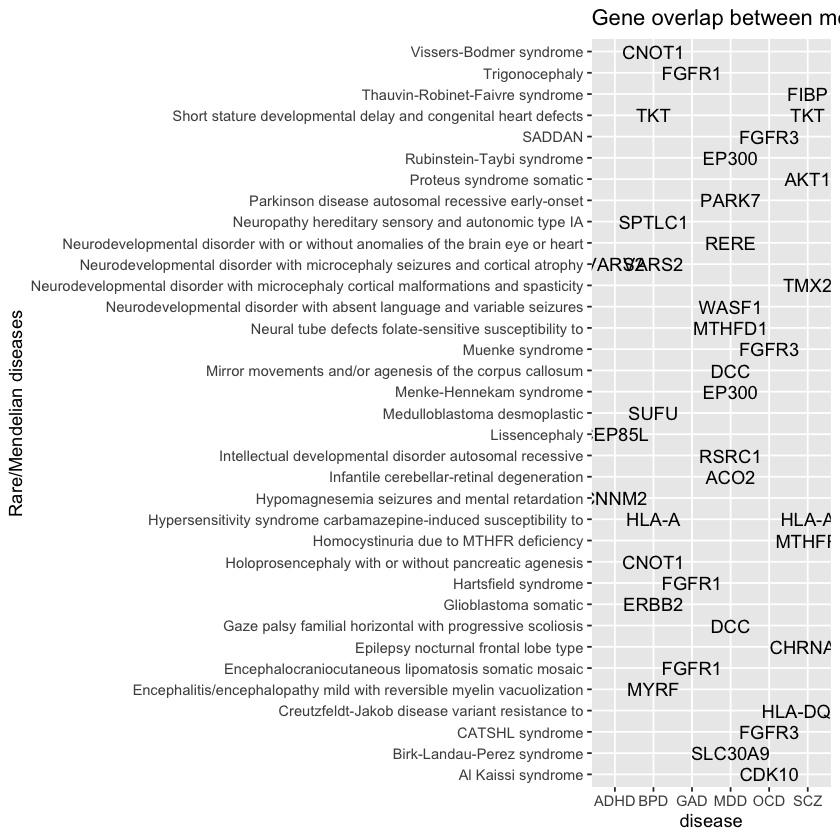

In [72]:

ggplot(omim_df%>%filter(poly_dz_abbr!=''), aes(x=poly_dz_abbr, y=mono_dz, label= overlap))+
# geom_point()+ 
    geom_text()+
# theme(axis.text.x=element_text(angle = -45, hjust = 0))+
#     theme_classic()+
    xlab('disease')+ylab('Rare/Mendelian diseases')+
    ggtitle('Gene overlap between monogenic diseases and daSNP eGenes')# between monogenic neurological diseases and neuropsychiatric eGenes')

ggsave('omim_enrichment/mono_poly_dotplot.pdf',width=10, height=7)